In [1]:
#firstly importing data
import pandas as pd

df=pd.read_csv("student_scores.csv")
df

,hours,score
0,5.993428,22.890288
1,4.723471,21.514130
2,6.295377,29.763313
3,8.046060,36.218912
4,4.531693,21.852038
...,...,...
95,2.072970,12.291437
96,5.592241,23.541916
97,5.522111,28.379178
98,5.010227,25.342178


In [2]:
#check the uncleand data
print(df.describe())
print(df.isnull().sum())

           hours       score
count  99.000000   99.000000
mean    4.707143   25.318198
std     1.882160   13.513906
min    -1.000000    1.383454
25%     3.753174   18.887547
50%     4.723471   23.541916
75%     5.737334   29.908342
max     8.704556  120.000000
hours    1
score    1
dtype: int64


In [3]:
#reparating hours data
median_hours = df.loc[df['hours'] > 0, 'hours'].median()
df.loc[df['hours'] <= 0, 'hours'] = median_hours
df['hours'] = df['hours'].fillna(df['hours'].median())


In [4]:
df

,hours,score
0,5.993428,22.890288
1,4.723471,21.514130
2,6.295377,29.763313
3,8.046060,36.218912
4,4.531693,21.852038
...,...,...
95,2.072970,12.291437
96,5.592241,23.541916
97,5.522111,28.379178
98,5.010227,25.342178


In [5]:
#reparating score data
df['score'] = df['score'].fillna(df['score'].median())
median_score = df[(df['score'] >= 0) & (df['score'] <= 100)]['score'].median()
df.loc[(df['score'] < 0) | (df['score'] > 100), 'score'] = median_score

In [6]:
df

,hours,score
0,5.993428,22.890288
1,4.723471,21.514130
2,6.295377,29.763313
3,8.046060,36.218912
4,4.531693,21.852038
...,...,...
95,2.072970,12.291437
96,5.592241,23.541916
97,5.522111,28.379178
98,5.010227,25.342178


In [7]:
#check after cleaning
print(df.describe())
print(df.isnull().sum())

            hours       score
count  100.000000  100.000000
mean     4.813133   24.335855
std      1.715429    9.450820
min      1.024862    1.383454
25%      3.856249   18.968743
50%      4.768703   23.541916
75%      5.730303   29.560806
max      8.704556   50.223058
hours    0
score    0
dtype: int64


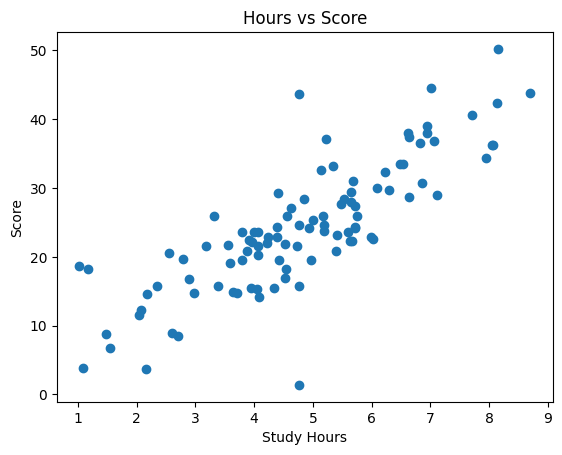

In [8]:
#visualization data
import matplotlib.pyplot as plt
plt.scatter(df['hours'], df['score'])
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Hours vs Score')
plt.show()


In [9]:
#change names of values 
X = df[['hours']]   
y = df['score']

In [10]:
#parting data into (Train / Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#make traing model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#print dealings 
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 2.0861131266785335
Coefficient: [4.57308591]


In [ ]:
#LinearRegression predicting
y_pred = model.predict(X_test)


In [14]:
#perfomance of data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}')

MAE: 3.164, RMSE: 3.837, R2: 0.733


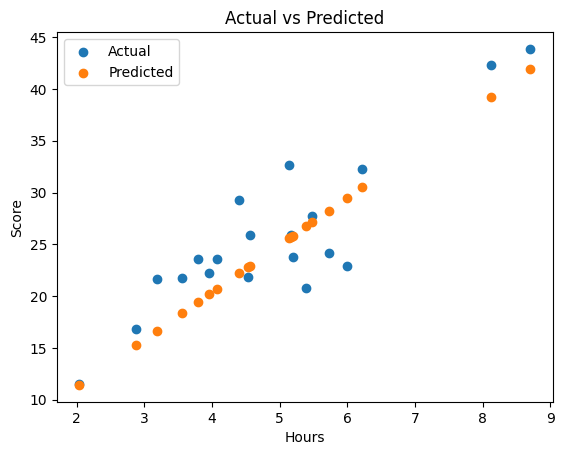

In [15]:
#visualization predicting data
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

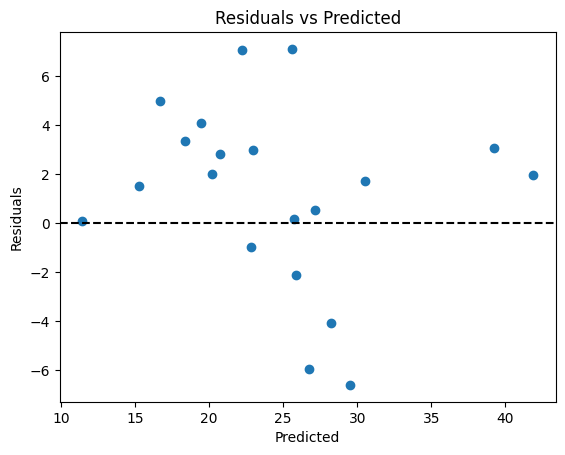

In [16]:
#visualization predicting data
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [17]:
#make traing model 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [18]:
#print dealings 
print('Intercept:', lasso.intercept_)
print('Coefficient:', lasso.coef_)

Intercept: 2.244748358335155
Coefficient: [4.53996441]


In [19]:
#lasso predicting
y_pred = lasso.predict(X_test)


In [20]:
#perfomance of data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}')

MAE: 3.158, RMSE: 3.829, R2: 0.734


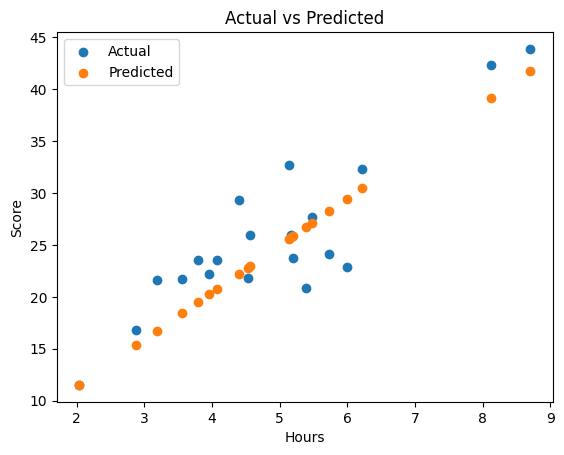

In [21]:
#visualization predicting data
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

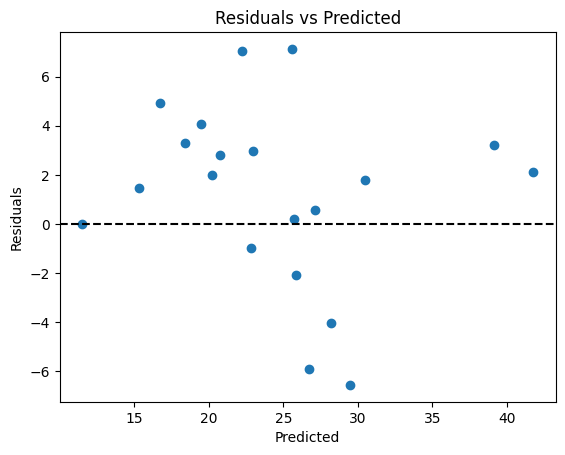

In [22]:
#visualization predicting data
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()